In [2]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from pathlib import Path
%matplotlib inline

In [3]:
# Read CSV, parse dates, set index
df = pd.read_csv((r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 10\3\07-Ins_Rolling_Out_of_Sample\Resources\OSPTX.csv'),
                 parse_dates=True, 
                 index_col='Date')

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-10-05 16:00:00,11735.36,11784.52,11618.12,11750.00,228276400
2006-10-06 16:00:00,11695.70,11750.00,11641.12,11690.89,178270688
2006-10-10 16:00:00,11716.64,11757.75,11690.89,11755.15,180168080
2006-10-11 16:00:00,11782.40,11784.43,11619.14,11619.14,250893136
2006-10-12 16:00:00,11667.42,11719.09,11619.14,11719.09,194297872


In [4]:
# Calculate return and lagged return
df["Return"] = df["Close"].pct_change()*100
df["Lagged_Return"] = df.Return.shift()
df.head()

,Open,High,Low,Close,Volume,Return,Lagged_Return
Date,,,,,,,
2006-10-05 16:00:00,11735.36,11784.52,11618.12,11750.00,228276400,NaN,NaN
2006-10-06 16:00:00,11695.70,11750.00,11641.12,11690.89,178270688,-0.503064,NaN
2006-10-10 16:00:00,11716.64,11757.75,11690.89,11755.15,180168080,0.549659,-0.503064
2006-10-11 16:00:00,11782.40,11784.43,11619.14,11619.14,250893136,-1.157025,0.549659
2006-10-12 16:00:00,11667.42,11719.09,11619.14,11719.09,194297872,0.860219,-1.157025


In [5]:
# Clean data
df = df.dropna()

df.head()

,Open,High,Low,Close,Volume,Return,Lagged_Return
Date,,,,,,,
2006-10-10 16:00:00,11716.64,11757.75,11690.89,11755.15,180168080,0.549659,-0.503064
2006-10-11 16:00:00,11782.40,11784.43,11619.14,11619.14,250893136,-1.157025,0.549659
2006-10-12 16:00:00,11667.42,11719.09,11619.14,11719.09,194297872,0.860219,-1.157025
2006-10-13 16:00:00,11754.61,11908.57,11719.09,11908.57,223986016,1.616849,0.860219
2006-10-16 16:00:00,11947.41,12072.26,11908.57,12061.54,196978528,1.284537,1.616849


In [6]:
# to_period("w") splits the series into weekly increments
df.index.to_period("w")

PeriodIndex(['2006-10-09/2006-10-15', '2006-10-09/2006-10-15',
             '2006-10-09/2006-10-15', '2006-10-09/2006-10-15',
             '2006-10-16/2006-10-22', '2006-10-16/2006-10-22',
             '2006-10-16/2006-10-22', '2006-10-16/2006-10-22',
             '2006-10-16/2006-10-22', '2006-10-23/2006-10-29',
             ...
             '2020-05-18/2020-05-24', '2020-05-18/2020-05-24',
             '2020-05-18/2020-05-24', '2020-05-18/2020-05-24',
             '2020-05-25/2020-05-31', '2020-05-25/2020-05-31',
             '2020-05-25/2020-05-31', '2020-05-25/2020-05-31',
             '2020-05-25/2020-05-31', '2020-06-01/2020-06-07'],
            dtype='period[W-SUN]', name='Date', length=3416, freq='W-SUN')

In [9]:
# construct a list of all Pandas weekly periods that are in the dataset:
weeks = df.index.to_period("w").unique()
weeks

PeriodIndex(['2006-10-09/2006-10-15', '2006-10-16/2006-10-22',
             '2006-10-23/2006-10-29', '2006-10-30/2006-11-05',
             '2006-11-06/2006-11-12', '2006-11-13/2006-11-19',
             '2006-11-20/2006-11-26', '2006-11-27/2006-12-03',
             '2006-12-04/2006-12-10', '2006-12-11/2006-12-17',
             ...
             '2020-03-30/2020-04-05', '2020-04-06/2020-04-12',
             '2020-04-13/2020-04-19', '2020-04-20/2020-04-26',
             '2020-04-27/2020-05-03', '2020-05-04/2020-05-10',
             '2020-05-11/2020-05-17', '2020-05-18/2020-05-24',
             '2020-05-25/2020-05-31', '2020-06-01/2020-06-07'],
            dtype='period[W-SUN]', name='Date', length=713, freq='W-SUN')

# Time Calculations

The following example shows the calculations for the first training period and the first testing period

In [10]:
# Training Window (26 weeks)
training_window = 26

In [11]:
# Beginning of training window
start_of_training_period = weeks[0].start_time.strftime(format="%Y-%m-%d")
start_of_training_period

'2006-10-09'

In [13]:
# End of training window
end_of_training_period = weeks[training_window + 0].end_time.strftime(format="%Y-%m-%d")
end_of_training_period 

'2007-04-15'

In [14]:
# The week of the first test window
test_week = weeks[training_window + 0 + 1]
test_week

Period('2007-04-16/2007-04-22', 'W-SUN')

In [15]:
# The first day of the test week
start_of_test_week = test_week.start_time.strftime(format="%Y-%m-%d")
start_of_test_week

'2007-04-16'

In [16]:
# The last day of the test week
end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
end_of_test_week

'2007-04-22'

In [18]:
# Training data with just one window
train = df[start_of_training_period:end_of_training_period]
train.head()

,Open,High,Low,Close,Volume,Return,Lagged_Return
Date,,,,,,,
2006-10-10 16:00:00,11716.64,11757.75,11690.89,11755.15,180168080,0.549659,-0.503064
2006-10-11 16:00:00,11782.40,11784.43,11619.14,11619.14,250893136,-1.157025,0.549659
2006-10-12 16:00:00,11667.42,11719.09,11619.14,11719.09,194297872,0.860219,-1.157025
2006-10-13 16:00:00,11754.61,11908.57,11719.09,11908.57,223986016,1.616849,0.860219
2006-10-16 16:00:00,11947.41,12072.26,11908.57,12061.54,196978528,1.284537,1.616849


In [19]:
# Testing data with just one window
test = df[start_of_test_week:end_of_test_week]
test.head()

,Open,High,Low,Close,Volume,Return,Lagged_Return
Date,,,,,,,
2007-04-16 16:00:00,13599.75,13667.12,13578.62,13659.98,205978544,0.599177,0.584978
2007-04-17 16:00:00,13712.20,13712.20,13630.33,13657.95,226247168,-0.014861,0.599177
2007-04-18 16:00:00,13612.66,13713.14,13612.66,13711.96,183662896,0.395447,-0.014861
2007-04-19 16:00:00,13582.46,13711.96,13538.98,13574.70,185490976,-1.001024,0.395447
2007-04-20 16:00:00,13666.14,13673.61,13574.70,13664.71,348114848,0.663072,-1.001024


# Putting it all together

In [20]:
# Set the training window as 26 weeks
# Total timeframe is 287 weeks
training_window = 26
timeframe = len(weeks) - training_window - 1
timeframe

686

In [21]:
# Construct an empty placeholder DataFrame, with a column named "Out-of-Sample Predictions"
# (Each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_predictions

,Out-of-Sample Predictions


In [22]:
# Construct a separate empty DataFrame for actual data
all_actuals = pd.DataFrame(columns=["Actual Returns"])
all_actuals

,Actual Returns


In [16]:
# Construct a separate empty DataFrame for actual data
all_actuals = pd.DataFrame(columns=["Actual Returns"])
all_actuals

,Actual Returns


In [23]:
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = weeks[training_window + i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_week = weeks[training_window + i + 1]
    
    # String of testing window
    start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = df[start_of_training_period:end_of_training_period]
    test = df[start_of_test_week:end_of_test_week]
    
    # Create new DataFrames:
    X_train = train["Lagged_Return"].to_frame()
    y_train = train["Return"]
    X_test = test["Lagged_Return"].to_frame()
    y_test = test["Return"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Create a temporary DataFrame to hold predictions
    predictions = pd.DataFrame(predictions, 
                               index=X_test.index, 
                               columns=["Out-of-Sample Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test DataFrame, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test,
                           index=y_test.index)
    
    actuals.columns = ["Actual Returns"]  
    
    # Append these two DataFrames (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)

In [24]:
# Once the loop is done, concatenate (combine) the two DataFrames to a final "Results" DataFrame:    
Results = pd.concat([all_actuals, 
                     all_predictions], axis=1)

Results.head()

,Actual Returns,Out-of-Sample Predictions
2007-04-16 16:00:00,0.599177,0.116730
2007-04-17 16:00:00,-0.014861,0.116694
2007-04-18 16:00:00,0.395447,0.118263
2007-04-19 16:00:00,-1.001024,0.117214
2007-04-20 16:00:00,0.663072,0.120782


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001693E147848>,
      dtype=object)

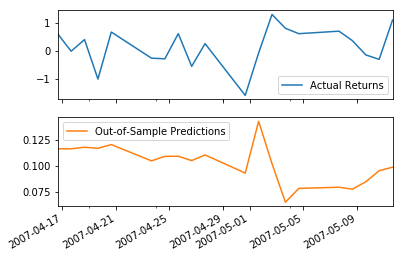

In [26]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)

# RMSE for Out-of-sample Predictions

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Set mean-squared-error
out_sample_mse = mean_squared_error(Results["Actual Returns"],
                                    Results["Out-of-Sample Predictions"])

print(f"Out sample MSE is {out_sample_mse}.")

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_sample_rmse = np.sqrt(out_sample_mse)
print(f"Out sample RMSE is {out_sample_rmse}.")

Out sample MSE is 1.4732247943047538.
Out sample RMSE is 1.213764719500758.
